# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Moch. Andyka Saputra
- Email:25andykas@gmail.com
- Id Dicoding:andyka

Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

## Persiapan

### Menyiapkan library yang dibutuhkan

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Menyiapkan data yang akan diguankan

## Data Understanding

In [3]:
data_path = '/content/drive/My Drive/dicoding/data.csv'

In [4]:
df = pd.read_csv(data_path, delimiter=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [8]:
df.duplicated().sum()

np.int64(0)

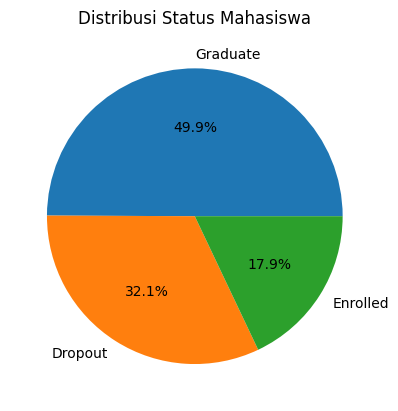

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [9]:
df_target = df['Status'].value_counts()
plt.pie(df_target, labels=df_target.index, autopct='%2.1f%%')
plt.title('Distribusi Status Mahasiswa')
plt.show()
df['Status'].value_counts()

Jumlah data: 4.424 baris × 37 kolom

Setiap kolom atau variabel memiliki nilai yang rasional

Setiap variabel memiliki tipe data yang sudah sesuai

Tidak ada missing values

Tidak ada duplikat

Kolom target: Target (berisi nilai seperti Dropout, Graduate, dan Enrolled)

Hampir setengah dari data memiliki target "Graduate"

In [10]:
df.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


Setiap kolom memiliki minimal 2 data unik.

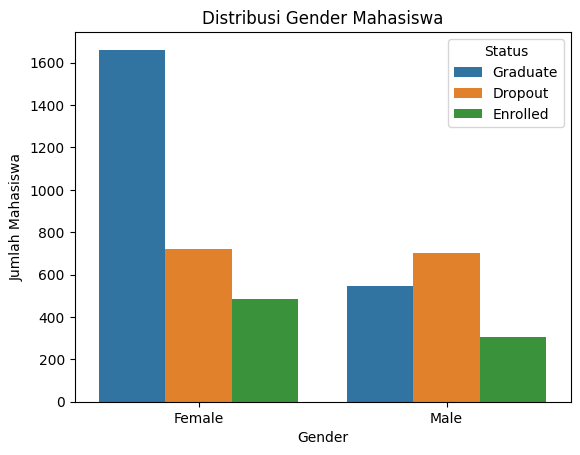

In [11]:
sns.countplot(data=df, x='Gender', hue='Status')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Jumlah Mahasiswa')
plt.title("Distribusi Gender Mahasiswa")
plt.show()

Mahasiswa perempuan menempati jumlah Graduate terbanyak.

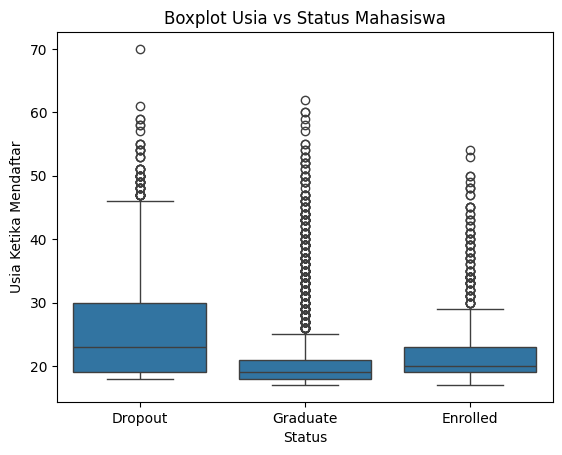

In [12]:
sns.boxplot(data=df, x='Status', y='Age_at_enrollment')
plt.ylabel('Usia Ketika Mendaftar')
plt.title('Boxplot Usia vs Status Mahasiswa')
plt.show()

Mahasiswa yang dropout cenderung mendaftar di usia lebih tua dibandingkan siswa yang lulus atau masih aktif.

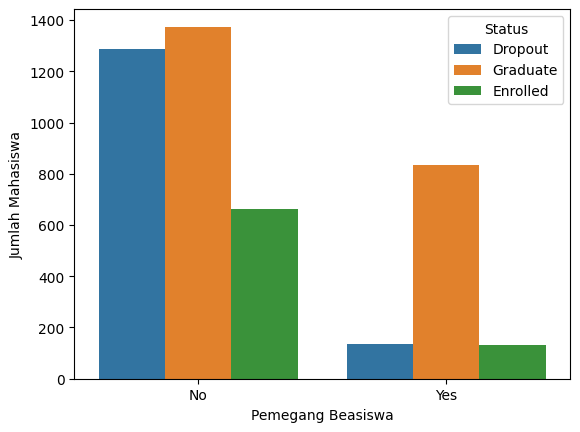

In [13]:
sns.countplot(data=df, x="Scholarship_holder", hue='Status')

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Pemegang Beasiswa')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

Mahasiswa penerima beasiswa memiliki peluang lebih tinggi dalam menyelesaikan studi "Graduate"

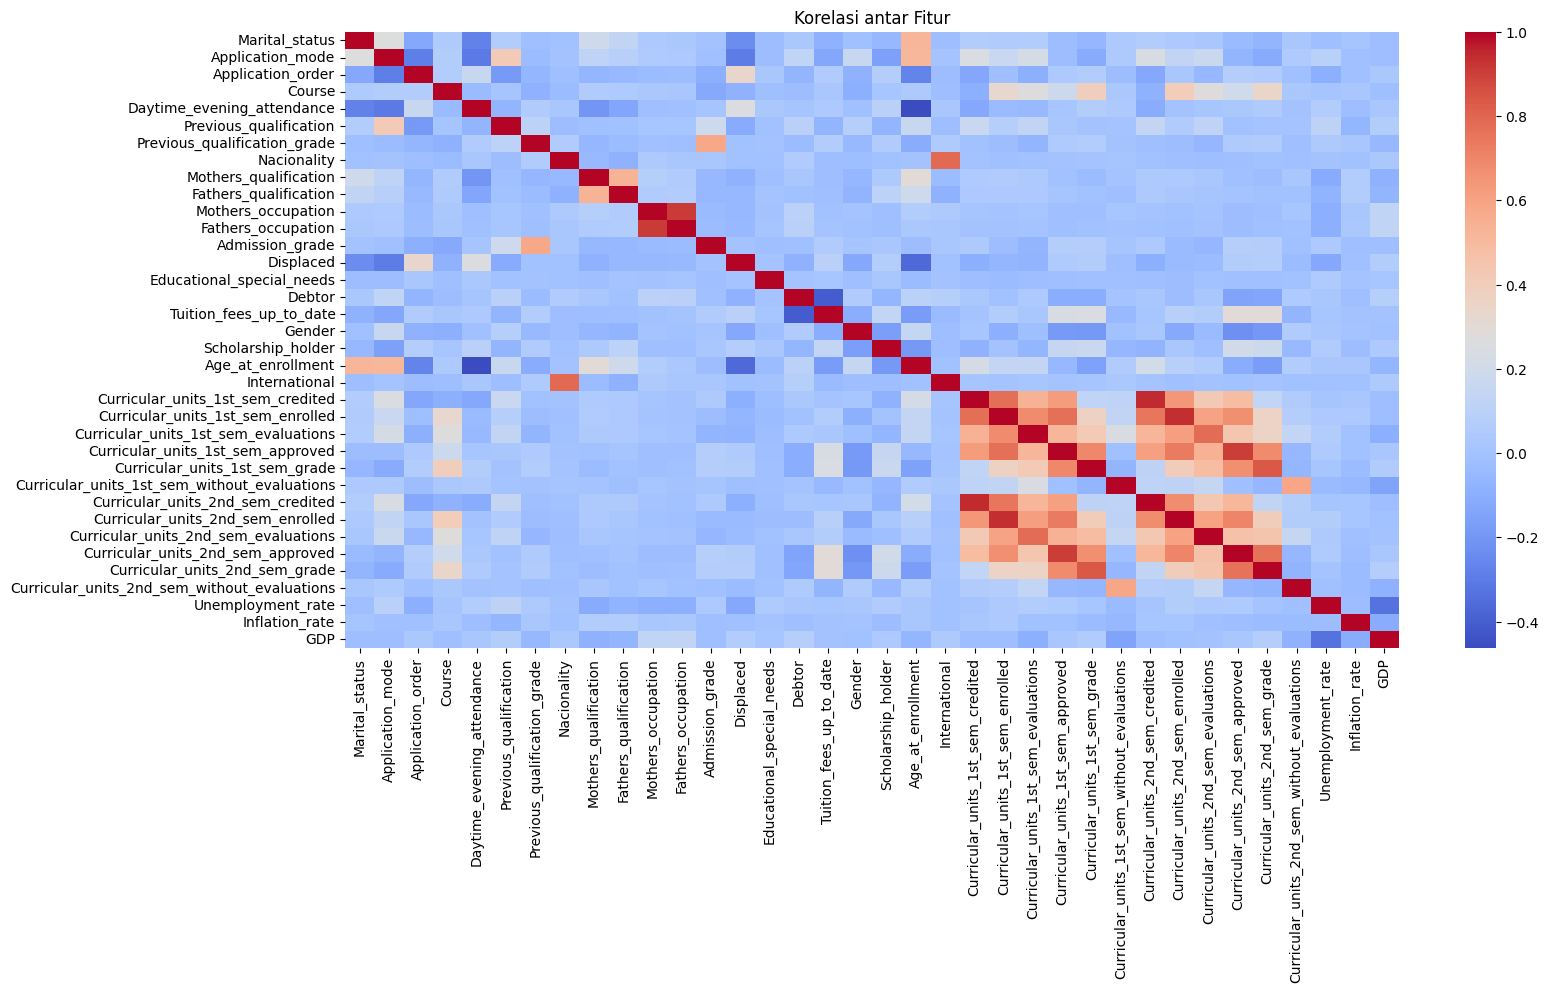

In [14]:
plt.figure(figsize=(17, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Korelasi antar Fitur")
plt.show()

## Data Preparation / Preprocessing

Encoding

In [15]:
df['Status']=df['Status'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


Feature Selection

In [16]:
correlations = df.corr(numeric_only=True)['Status'].sort_values(ascending=False)
print(correlations)

Status                                          1.000000
Curricular_units_2nd_sem_grade                  0.429214
Curricular_units_2nd_sem_approved               0.351135
Curricular_units_1st_sem_grade                  0.349652
Tuition_fees_up_to_date                         0.342121
Curricular_units_1st_sem_approved               0.290243
Curricular_units_2nd_sem_evaluations            0.194412
Curricular_units_1st_sem_evaluations            0.125278
Scholarship_holder                              0.114517
Displaced                                       0.070649
Daytime_evening_attendance                      0.066439
Curricular_units_2nd_sem_enrolled               0.060670
Curricular_units_1st_sem_enrolled               0.052020
Mothers_occupation                              0.051664
Fathers_occupation                              0.051455
Admission_grade                                 0.038716
GDP                                             0.037052
Application_order              

In [17]:
X = df.drop(columns='Status')
y = df['Status']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance)


                                         feature  importance
30             Curricular_units_2nd_sem_approved    0.139741
31                Curricular_units_2nd_sem_grade    0.112829
24             Curricular_units_1st_sem_approved    0.090682
25                Curricular_units_1st_sem_grade    0.060050
12                               Admission_grade    0.043596
16                       Tuition_fees_up_to_date    0.040820
29          Curricular_units_2nd_sem_evaluations    0.039897
19                             Age_at_enrollment    0.038543
6                   Previous_qualification_grade    0.037901
23          Curricular_units_1st_sem_evaluations    0.034392
3                                         Course    0.031275
11                            Fathers_occupation    0.028987
10                            Mothers_occupation    0.026241
35                                           GDP    0.024086
28             Curricular_units_2nd_sem_enrolled    0.023304
33                      

Kita akan mempertimbangkan fitur yang:

*   Korelasi dengan Status > ±0.05
*   Importance > 0.01
*   Berkontribusi ke model

In [18]:
df.drop(columns=[
    "Curricular_units_1st_sem_credited",
    "Curricular_units_2nd_sem_credited",
    "Previous_qualification",
    "Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_2nd_sem_without_evaluations",
    "Nacionality",
    "International",
    "Educational_special_needs",
    "Application_mode",
    "Application_order",
    "Course",
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation",
    "Unemployment_rate",
    "Inflation_rate",
    "GDP"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marital_status                        4424 non-null   int64  
 1   Daytime_evening_attendance            4424 non-null   int64  
 2   Previous_qualification_grade          4424 non-null   float64
 3   Admission_grade                       4424 non-null   float64
 4   Displaced                             4424 non-null   int64  
 5   Debtor                                4424 non-null   int64  
 6   Tuition_fees_up_to_date               4424 non-null   int64  
 7   Gender                                4424 non-null   int64  
 8   Scholarship_holder                    4424 non-null   int64  
 9   Age_at_enrollment                     4424 non-null   int64  
 10  Curricular_units_1st_sem_enrolled     4424 non-null   int64  
 11  Curricular_units_

0.    Marital_status : Status perkawinan mahasiswa. (Kategori) 1 – lajang 2 – menikah 3 – bercerai
1.    Daytime_evening_attendance : Apakah siswa menghadiri kelas pada siang hari atau malam hari. (Kategori) 1 – siang hari 0 – malam hari
2.   Previous_qualification_grade : Nilai kualifikasi sebelumnya (antara 0 dan 200)
3.   Admission_grade : Nilai penerimaan (antara 0 dan 200)
4.   Displaced : Apakah siswa tersebut merupakan orang terlantar. (Kategori) 1 – ya 0 – tidak
5.   Debtor : Apakah mahasiswa tersebut merupakan debitur. (Kategori) 1 – ya 0 – tidak
6.   Tuition_fees_up_to_date : Apakah biaya kuliah siswa sudah sesuai dengan yang seharusnya. (Kategori) 1 – ya 0 – tidak
7.   Gender : Jenis kelamin mahasiswa. (Kategori) 1 – laki-laki 0 ​​– perempuan
8.   Scholarship_holder : Apakah mahasiswa tersebut merupakan penerima beasiswa (Kategori) 1 – ya 0 – tidak
9.   Age_at_enrollment : Usia mahasiswa pada saat pendaftaran
10.   Curricular_units_1st_sem_enrolled : Jumlah satuan mata kuliah yang diambil pada semester pertama
11.   Curricular_units_1st_sem_evaluations : Jumlah unit kurikulum yang dievaluasi pada semester pertama
12.   Curricular_units_1st_sem_approved : Jumlah satuan kurikulum yang disetujui pada semester pertama
13.   Curricular_units_1st_sem_grade : Rata-rata nilai semester 1 (antara 0 dan 20)
14.   Curricular_units_2nd_sem_enrolled : Jumlah satuan mata kuliah yang diambil pada semester kedua
15.   Curricular_units_2nd_sem_evaluations : Jumlah unit kurikulum yang dievaluasi pada semester kedua
16.   Curricular_units_2nd_sem_approved : Jumlah satuan kurikulum yang disetujui pada semester kedua
17.   Curricular_units_2nd_sem_grade : Rata-rata nilai semester 2 (antara 0 dan 20)
18.   Status : Target. Masalah dirumuskan sebagai tugas klasifikasi tiga kategori (0 - Dropout, 1 - Graduate, 2 - Enrolled)


Re-mapping Kategori

In [19]:
df['Marital_status'] = df['Marital_status'].replace({
    5: 2,  # menikah secara sah → menikah
    4: 3,  # duda → bercerai
    6: 3   # berpisah secara sah → bercerai
})

df['Marital_status'].value_counts()

,count
Marital_status,
1,3919
2,404
3,101


mengubah variabel menjadi string untuk mempermudah pembuatan dashboard

In [20]:
df_students = df.copy()
df_students['Debtor'] = df_students['Debtor'].replace({1: 'Ya', 0: 'Tidak'})
df_students['Tuition_fees_up_to_date'] = df_students['Tuition_fees_up_to_date'].replace({1: 'Ya', 0: 'Tidak'})
df_students['Gender'] = df_students['Gender'].replace({1: 'Laki-Laki', 0: 'Perempuan'})
df_students['Scholarship_holder'] = df_students['Scholarship_holder'].replace({1: 'Ya', 0: 'Tidak'})
df_students['Status'] = df_students['Status'].replace({2: 'Enrolled', 1: 'Graduate', 0: 'Droupout'})
df_students['Marital_status'] = df_students['Marital_status'].replace({3: 'Bercerai', 2: 'Menikah', 1: 'Lajang'})
df_students['Daytime_evening_attendance'] = df_students['Daytime_evening_attendance'].replace({1: 'Siang', 0: 'Malam'})
df_students['Displaced'] = df_students['Displaced'].replace({1: 'Ya', 0: 'Tidak'})

In [21]:
df_students.head()

,Marital_status,Daytime_evening_attendance,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,Lajang,Siang,122.0,127.3,Ya,Tidak,Ya,Laki-Laki,Tidak,20,0,0,0,0.000000,0,0,0,0.000000,Droupout
1,Lajang,Siang,160.0,142.5,Ya,Tidak,Tidak,Laki-Laki,Tidak,19,6,6,6,14.000000,6,6,6,13.666667,Graduate
2,Lajang,Siang,122.0,124.8,Ya,Tidak,Tidak,Laki-Laki,Tidak,19,6,0,0,0.000000,6,0,0,0.000000,Droupout
3,Lajang,Siang,122.0,119.6,Ya,Tidak,Ya,Perempuan,Tidak,20,6,8,6,13.428571,6,10,5,12.400000,Graduate
4,Menikah,Malam,100.0,141.5,Tidak,Tidak,Ya,Perempuan,Tidak,45,6,9,5,12.333333,6,6,6,13.000000,Graduate


In [22]:
df_students.to_csv('/content/drive/My Drive/dicoding/students.csv', index=False)

Train Test Split

In [23]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

(3539, 18)
(885, 18)


Pembagian dataset dengan proposi 80% untuk train dan test 20%

Feature Scaling

In [24]:
df.describe()

,Marital_status,Daytime_evening_attendance,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.136980,0.890823,132.613314,126.978119,0.548373,0.113698,0.880651,0.351718,0.248418,23.265145,6.270570,8.299051,4.706600,10.640822,6.232143,8.063291,4.435805,10.230206,0.858273
std,0.404863,0.311897,13.188332,14.482001,0.497711,0.317480,0.324235,0.477560,0.432144,7.587816,2.480178,4.179106,3.094238,4.843663,2.195951,3.947951,3.014764,5.210808,0.693326
min,1.000000,0.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,125.000000,117.900000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,5.000000,6.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,1.000000,1.000000,133.100000,126.100000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000,8.000000,5.000000,12.285714,6.000000,8.000000,5.000000,12.200000,1.000000
75%,1.000000,1.000000,140.000000,134.800000,1.000000,0.000000,1.000000,1.000000,0.000000,25.000000,7.000000,10.000000,6.000000,13.400000,7.000000,10.000000,6.000000,13.333333,1.000000
max,3.000000,1.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,45.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429,2.000000


In [25]:
features_to_scale = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
]

scaler = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), features_to_scale)
    ],
    remainder='passthrough'
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Simpan scaler ke file
joblib.dump(scaler, '/content/drive/My Drive/dicoding/model/scaler.joblib')

print("Scaler disimpan sebagai scaler.joblib")

Scaler disimpan sebagai scaler.joblib


SMOTE (Synthetic Minority Over-sampling Technique)

In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print(X_train_resampled.shape)

(5301, 18)


In [27]:
print(y_train_resampled.value_counts())

Status
1    1767
0    1767
2    1767
Name: count, dtype: int64


## Modeling

In [28]:
# Model 1: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [29]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [30]:
# Model 3: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

## Evaluation

In [35]:
def evaluate_model(y_true, y_pred, model_name):
    plt.figure(figsize=(6,4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("Classification Report:\n", classification_report(y_true, y_pred))

Evaluasi Model Decision Tree

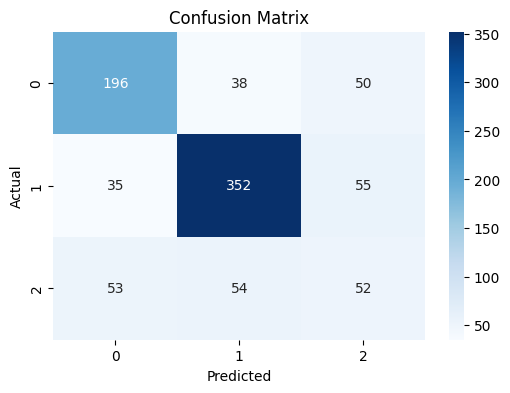

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       284
           1       0.79      0.80      0.79       442
           2       0.33      0.33      0.33       159

    accuracy                           0.68       885
   macro avg       0.60      0.60      0.60       885
weighted avg       0.68      0.68      0.68       885



In [36]:
y_pred_dt = dt_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_dt, "Decision Tree")

Evaluasi Model Random Forest

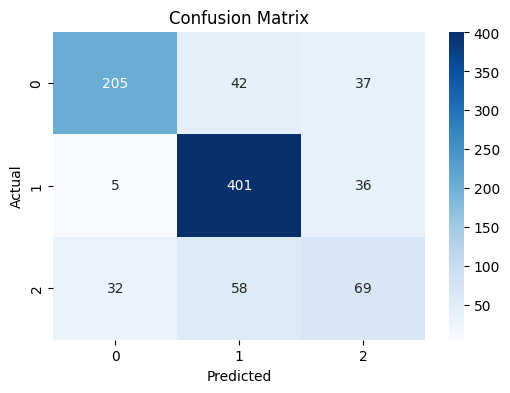

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       284
           1       0.80      0.91      0.85       442
           2       0.49      0.43      0.46       159

    accuracy                           0.76       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.76      0.76      0.76       885



In [37]:
y_pred_rf = rf_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest")

Evaluasi Model Random Forest

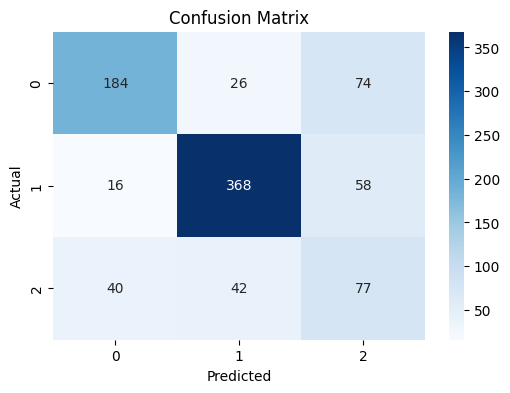

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.65      0.70       284
           1       0.84      0.83      0.84       442
           2       0.37      0.48      0.42       159

    accuracy                           0.71       885
   macro avg       0.66      0.65      0.65       885
weighted avg       0.73      0.71      0.72       885



In [38]:
y_pred_lr = lr_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

Save Best Model

In [39]:
joblib.dump(rf_model, '/content/drive/My Drive/dicoding/model/rf_model.joblib')

print("Model Random Forest terbaik telah disimpan sebagai rf_model.joblib")

Model Random Forest terbaik telah disimpan sebagai rf_model.joblib
